<a href="https://colab.research.google.com/github/Dipika591/Basic_Python/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [6]:
# Load dataset
file_path = '/content/EastWestAirlines.xlsx'
data = pd.read_excel(file_path, sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
# Drop irrelevant columns
features = data.drop(columns=['ID#', 'Award?'])

In [8]:
# Handle missing values (if any)
features = features.dropna()

In [9]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)

In [11]:
# Hierarchical Clustering
hierarchical = linkage(scaled_features, method='ward')
hierarchical_labels = fcluster(hierarchical, t=3, criterion='maxclust')

In [12]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

In [13]:
# Silhouette score for DBSCAN (ignoring noise points)
dbscan_silhouette = silhouette_score(scaled_features[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])

In [14]:
# Visualization
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Text(0, 0.5, 'Feature 2')

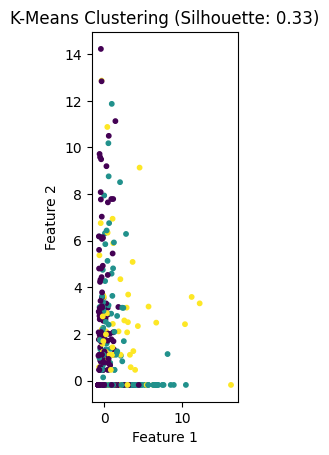

In [15]:
# K-Means Visualization
plt.subplot(1, 3, 1)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title(f'K-Means Clustering (Silhouette: {kmeans_silhouette:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Distance')

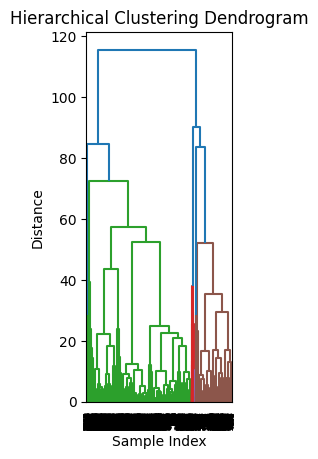

In [16]:
# Hierarchical Clustering Dendrogram
plt.subplot(1, 3, 2)
dendrogram(hierarchical)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

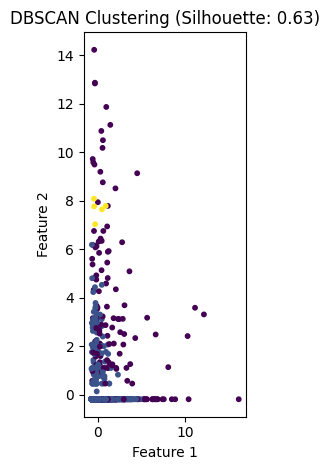

In [17]:
# DBSCAN Visualization
plt.subplot(1, 3, 3)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title(f'DBSCAN Clustering (Silhouette: {dbscan_silhouette:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()